# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and any other required libraries.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for seaborn
sns.set(style="whitegrid")

# Display plots inline in Jupyter Notebook
%matplotlib inline

# Load Dataset
Load the dataset into a pandas DataFrame.

In [8]:
# Load the dataset into a pandas DataFrame
file_path = '../data/benin-malanville.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify loading
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Summary Statistics
Calculate the mean, median, standard deviation, and other statistical measures for each numeric column, excluding 'Timestamp' and 'Comments'.

In [9]:
# Summary Statistics

# Drop 'Timestamp' and 'Comments' columns as they are not numeric
df_numeric = df.drop(columns=['Timestamp', 'Comments'])

# Calculate summary statistics
summary_stats = df_numeric.describe().transpose()

# Calculate additional statistics: median and standard deviation
summary_stats['median'] = df_numeric.median()
summary_stats['std'] = df_numeric.std()

# Display the summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max,median
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0,1.8
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3,-0.1
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2,1.6
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3,4.5
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3,4.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8,28.0
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0,55.1
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5,1.9
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6,2.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2,0.5


# Data Quality Check
Check for missing values, outliers, or incorrect entries in columns like GHI, DNI, DHI, ModA, ModB, WS, and WSgust.

In [10]:
# Data Quality Check

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Identify columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values
columns_with_missing_values

# Check for outliers using the IQR method
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))

# Display the number of outliers in each column
outliers_sum = outliers.sum()

# Identify columns with outliers
columns_with_outliers = outliers_sum[outliers_sum > 0]

# Display columns with outliers
columns_with_outliers

# Check for incorrect entries (e.g., negative values where only positive should exist)
# Assuming GHI, DNI, DHI, ModA, ModB, WS, and WSgust should only have positive values
incorrect_entries = df_numeric[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0

# Display the number of incorrect entries in each column
incorrect_entries_sum = incorrect_entries.sum()

# Identify columns with incorrect entries
columns_with_incorrect_entries = incorrect_entries_sum[incorrect_entries_sum > 0]

# Display columns with incorrect entries
columns_with_incorrect_entries

GHI    258847
DNI    275987
DHI    259182
dtype: int64

# Time Series Analysis
Plot bar charts or line charts of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout the day, or anomalies.

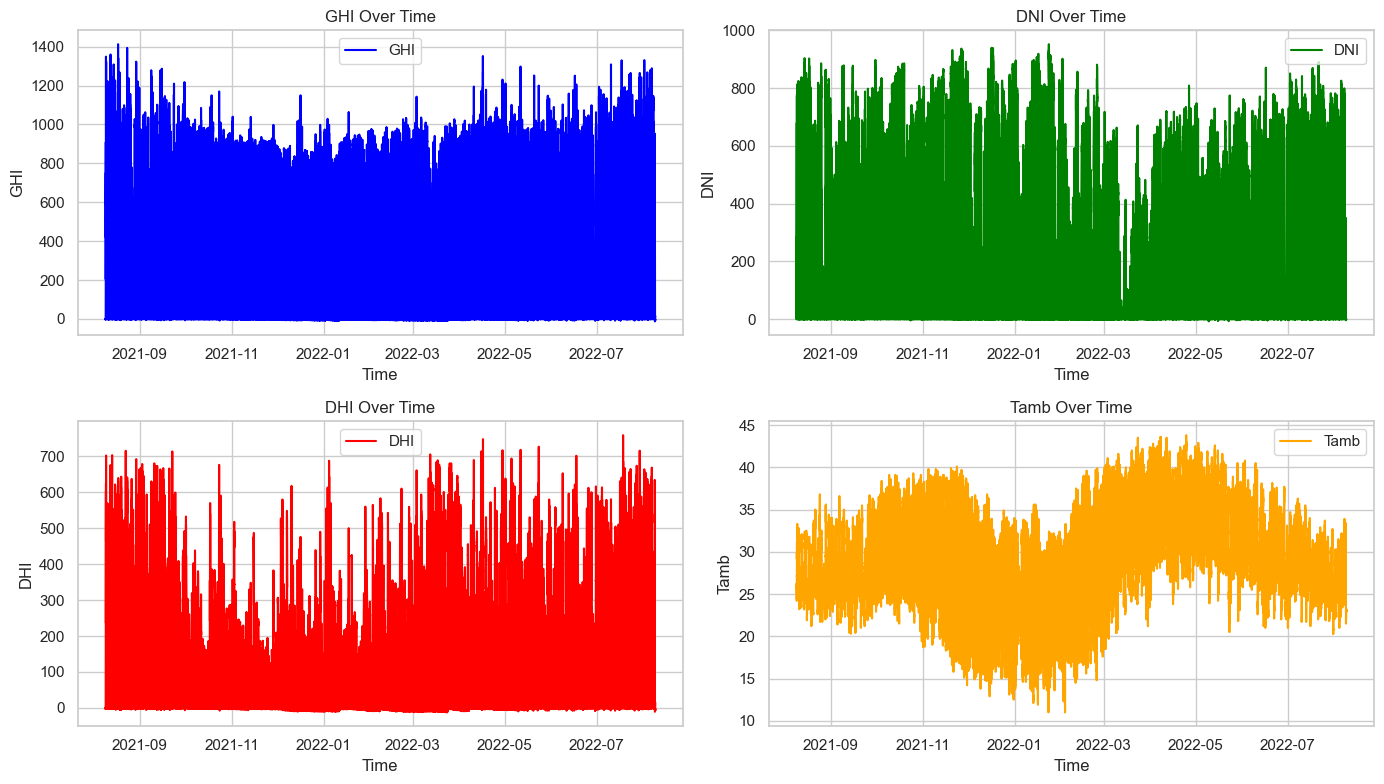

C:\Users\weldu\AppData\Local\Temp\ipykernel_22012\4225620403.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


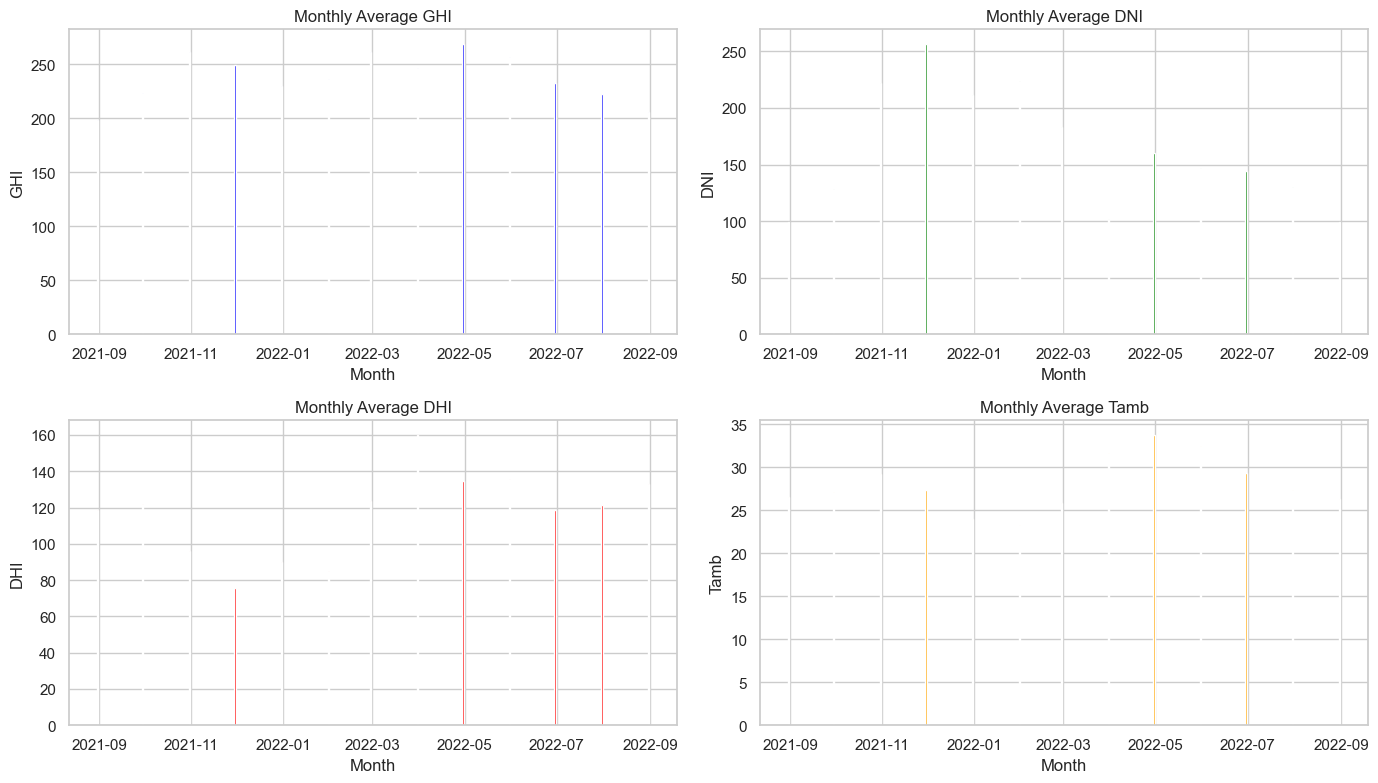

In [11]:
# Time Series Analysis

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' as the index of the DataFrame
df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 8))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='blue')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.title('GHI Over Time')
plt.legend()

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='green')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.title('DNI Over Time')
plt.legend()

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='red')
plt.xlabel('Time')
plt.ylabel('DHI')
plt.title('DHI Over Time')
plt.legend()

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='orange')
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.title('Tamb Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Resample data by month and plot
df_monthly = df.resample('M').mean()

plt.figure(figsize=(14, 8))

# Plot GHI by month
plt.subplot(2, 2, 1)
plt.bar(df_monthly.index, df_monthly['GHI'], color='blue')
plt.xlabel('Month')
plt.ylabel('GHI')
plt.title('Monthly Average GHI')

# Plot DNI by month
plt.subplot(2, 2, 2)
plt.bar(df_monthly.index, df_monthly['DNI'], color='green')
plt.xlabel('Month')
plt.ylabel('DNI')
plt.title('Monthly Average DNI')

# Plot DHI by month
plt.subplot(2, 2, 3)
plt.bar(df_monthly.index, df_monthly['DHI'], color='red')
plt.xlabel('Month')
plt.ylabel('DHI')
plt.title('Monthly Average DHI')

# Plot Tamb by month
plt.subplot(2, 2, 4)
plt.bar(df_monthly.index, df_monthly['Tamb'], color='orange')
plt.xlabel('Month')
plt.ylabel('Tamb')
plt.title('Monthly Average Tamb')

plt.tight_layout()
plt.show()

# Evaluate Impact of Cleaning
Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

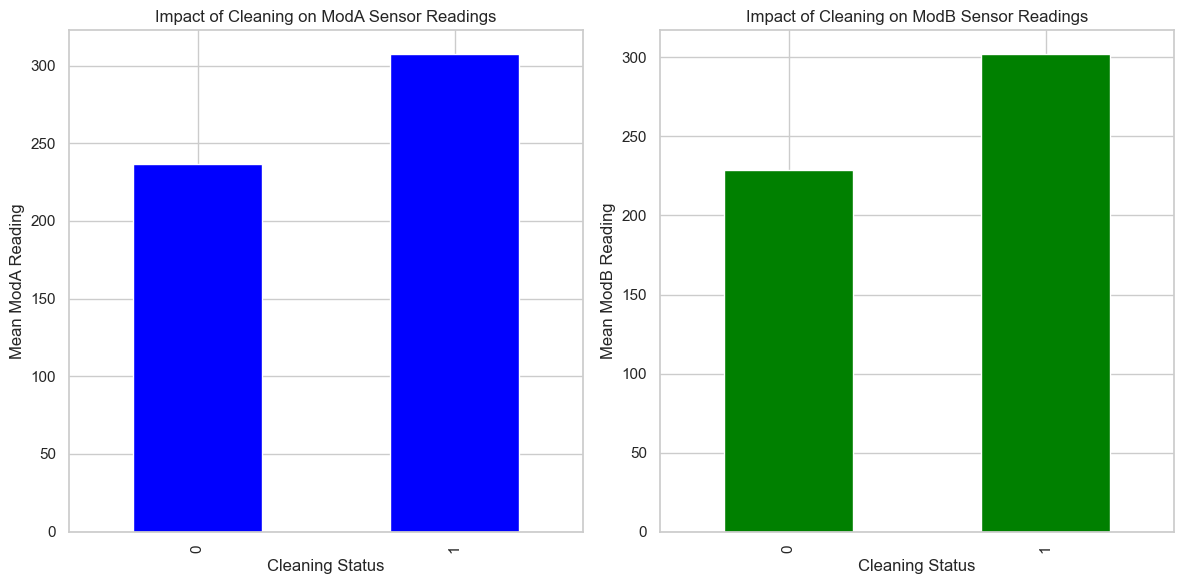

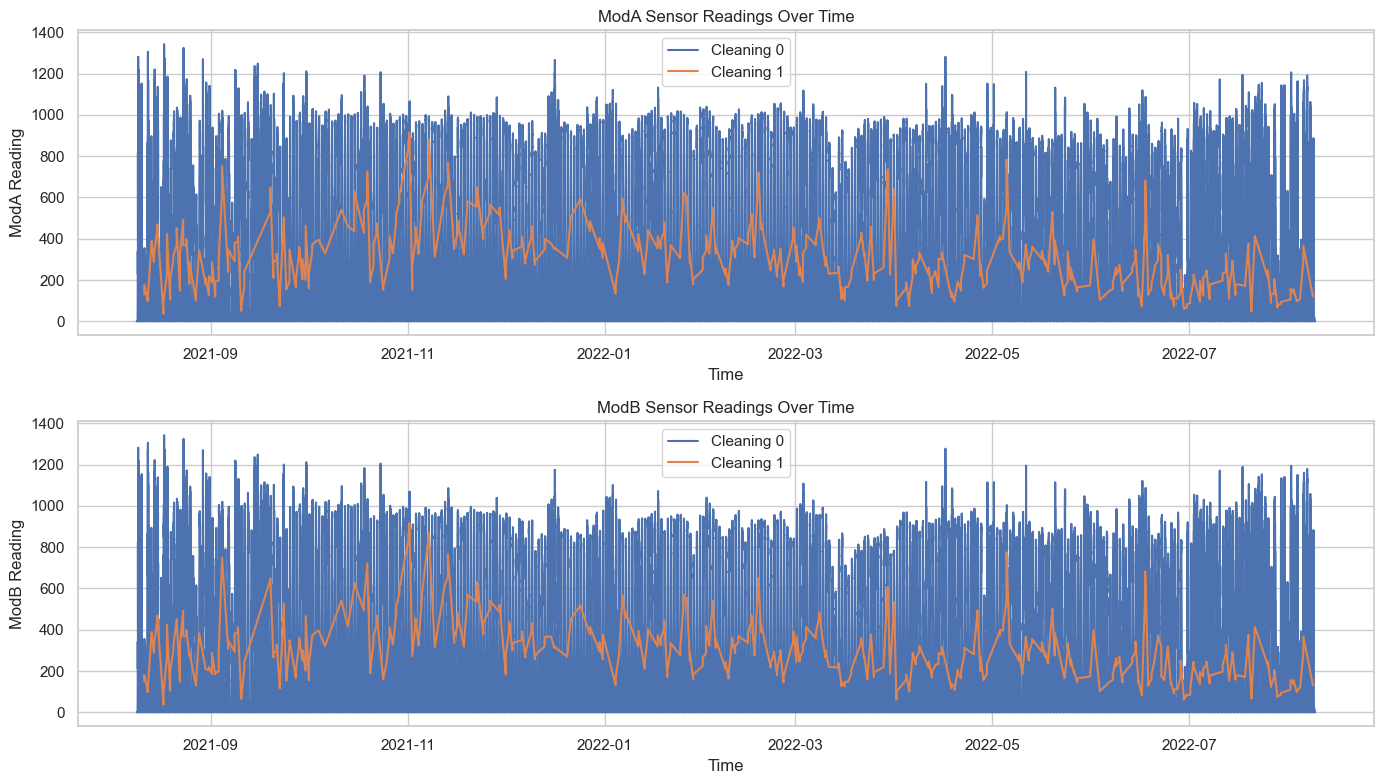

In [12]:
# Evaluate Impact of Cleaning

# Group data by 'Cleaning' status and calculate mean sensor readings for ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot the impact of cleaning on ModA and ModB sensor readings
plt.figure(figsize=(12, 6))

# Plot ModA
plt.subplot(1, 2, 1)
cleaning_impact['ModA'].plot(kind='bar', color='blue')
plt.xlabel('Cleaning Status')
plt.ylabel('Mean ModA Reading')
plt.title('Impact of Cleaning on ModA Sensor Readings')

# Plot ModB
plt.subplot(1, 2, 2)
cleaning_impact['ModB'].plot(kind='bar', color='green')
plt.xlabel('Cleaning Status')
plt.ylabel('Mean ModB Reading')
plt.title('Impact of Cleaning on ModB Sensor Readings')

plt.tight_layout()
plt.show()

# Plot ModA and ModB sensor readings over time, colored by cleaning status
plt.figure(figsize=(14, 8))

# Plot ModA over time
plt.subplot(2, 1, 1)
for cleaning_status in df['Cleaning'].unique():
    subset = df[df['Cleaning'] == cleaning_status]
    plt.plot(subset.index, subset['ModA'], label=f'Cleaning {cleaning_status}')
plt.xlabel('Time')
plt.ylabel('ModA Reading')
plt.title('ModA Sensor Readings Over Time')
plt.legend()

# Plot ModB over time
plt.subplot(2, 1, 2)
for cleaning_status in df['Cleaning'].unique():
    subset = df[df['Cleaning'] == cleaning_status]
    plt.plot(subset.index, subset['ModB'], label=f'Cleaning {cleaning_status}')
plt.xlabel('Time')
plt.ylabel('ModB Reading')
plt.title('ModB Sensor Readings Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation Analysis
Use correlation matrices or pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB). Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl (44.5 MB)


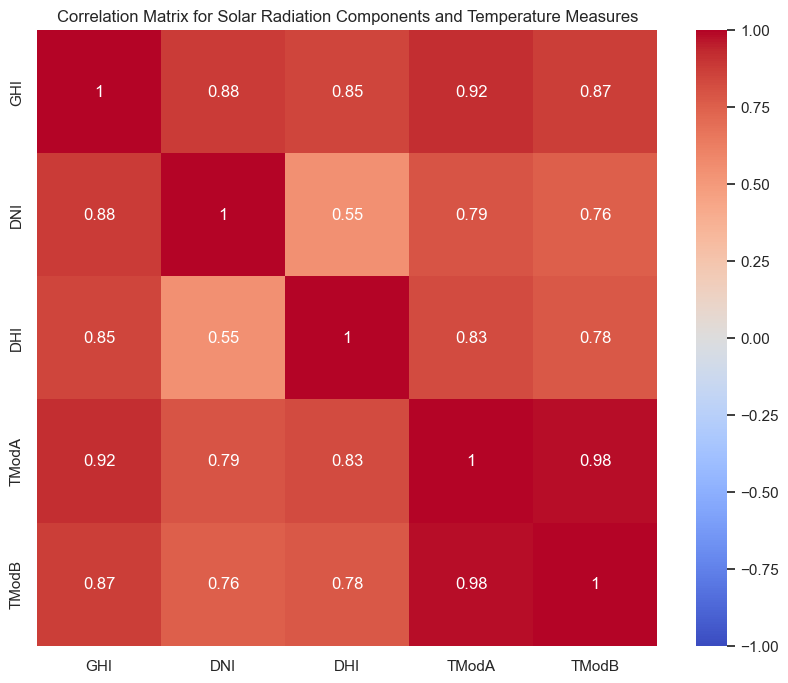

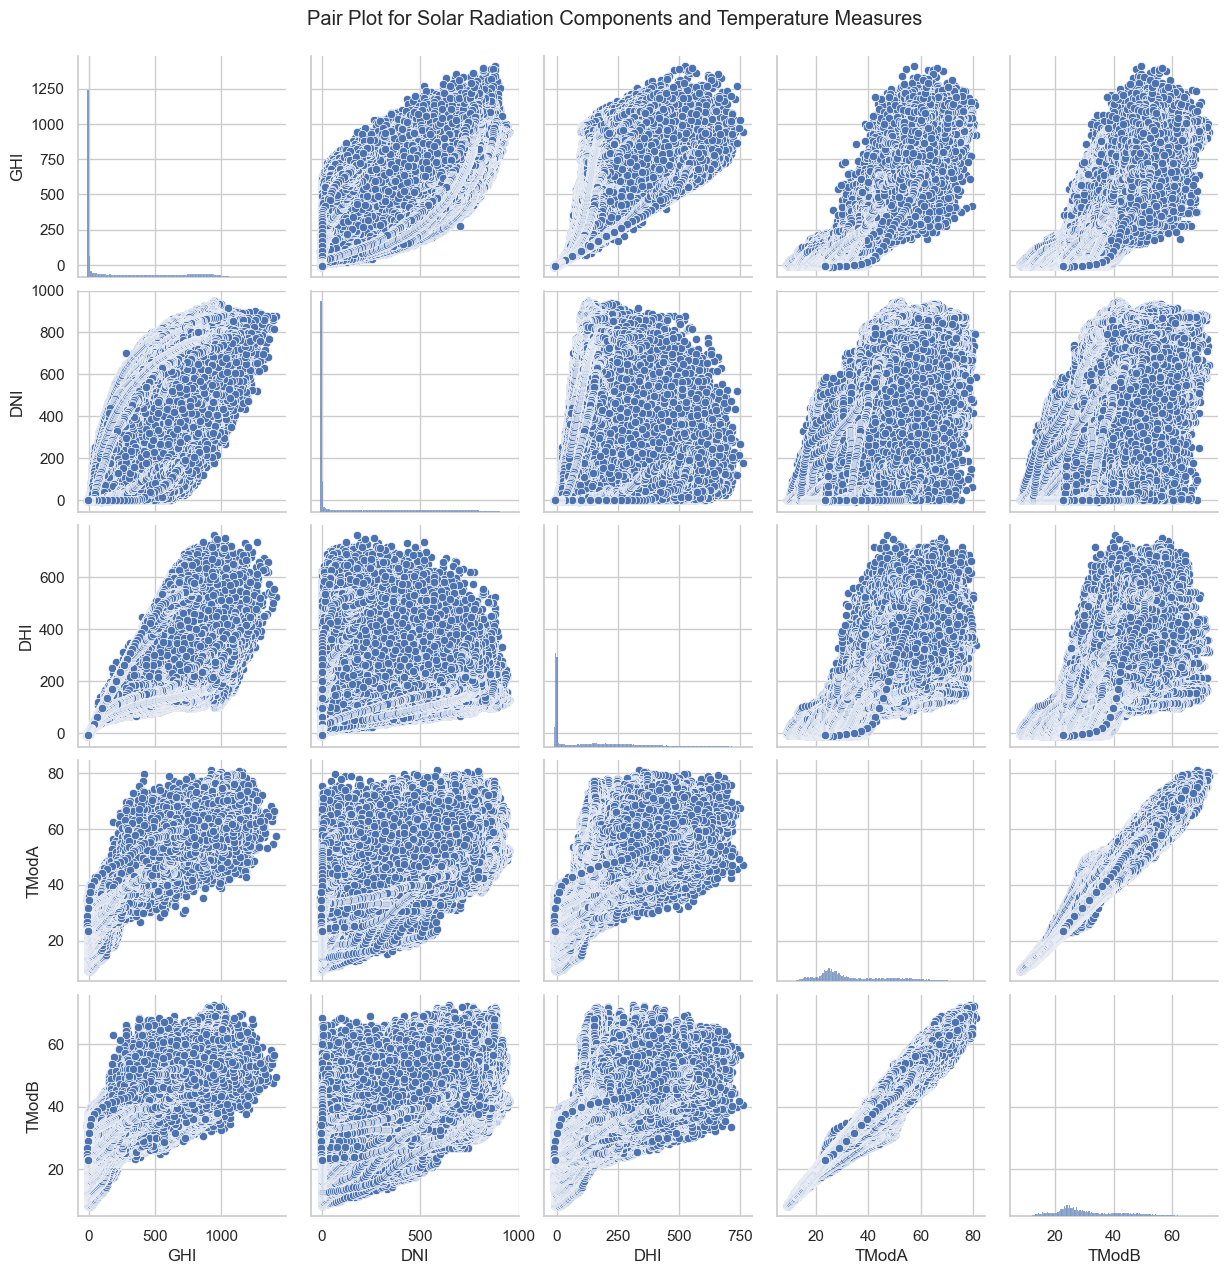

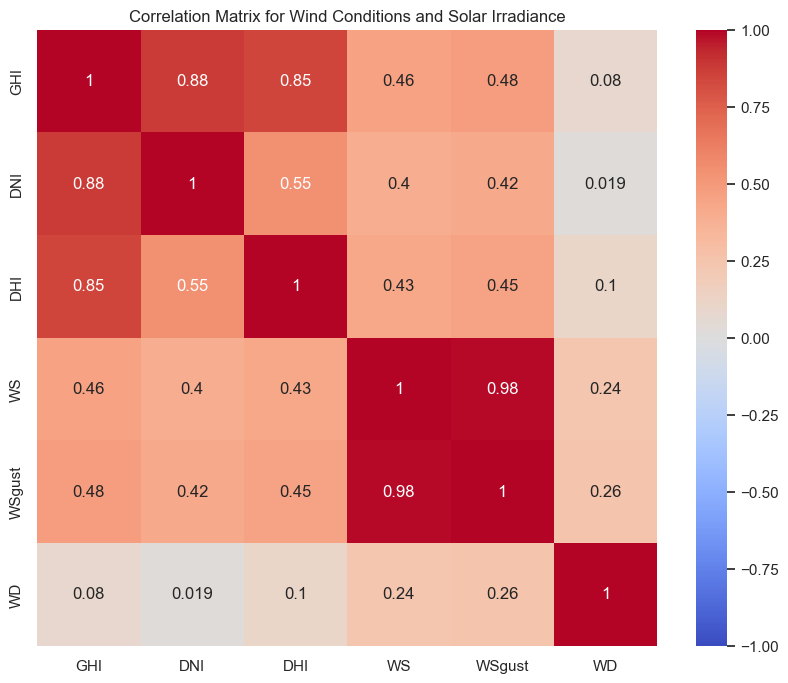

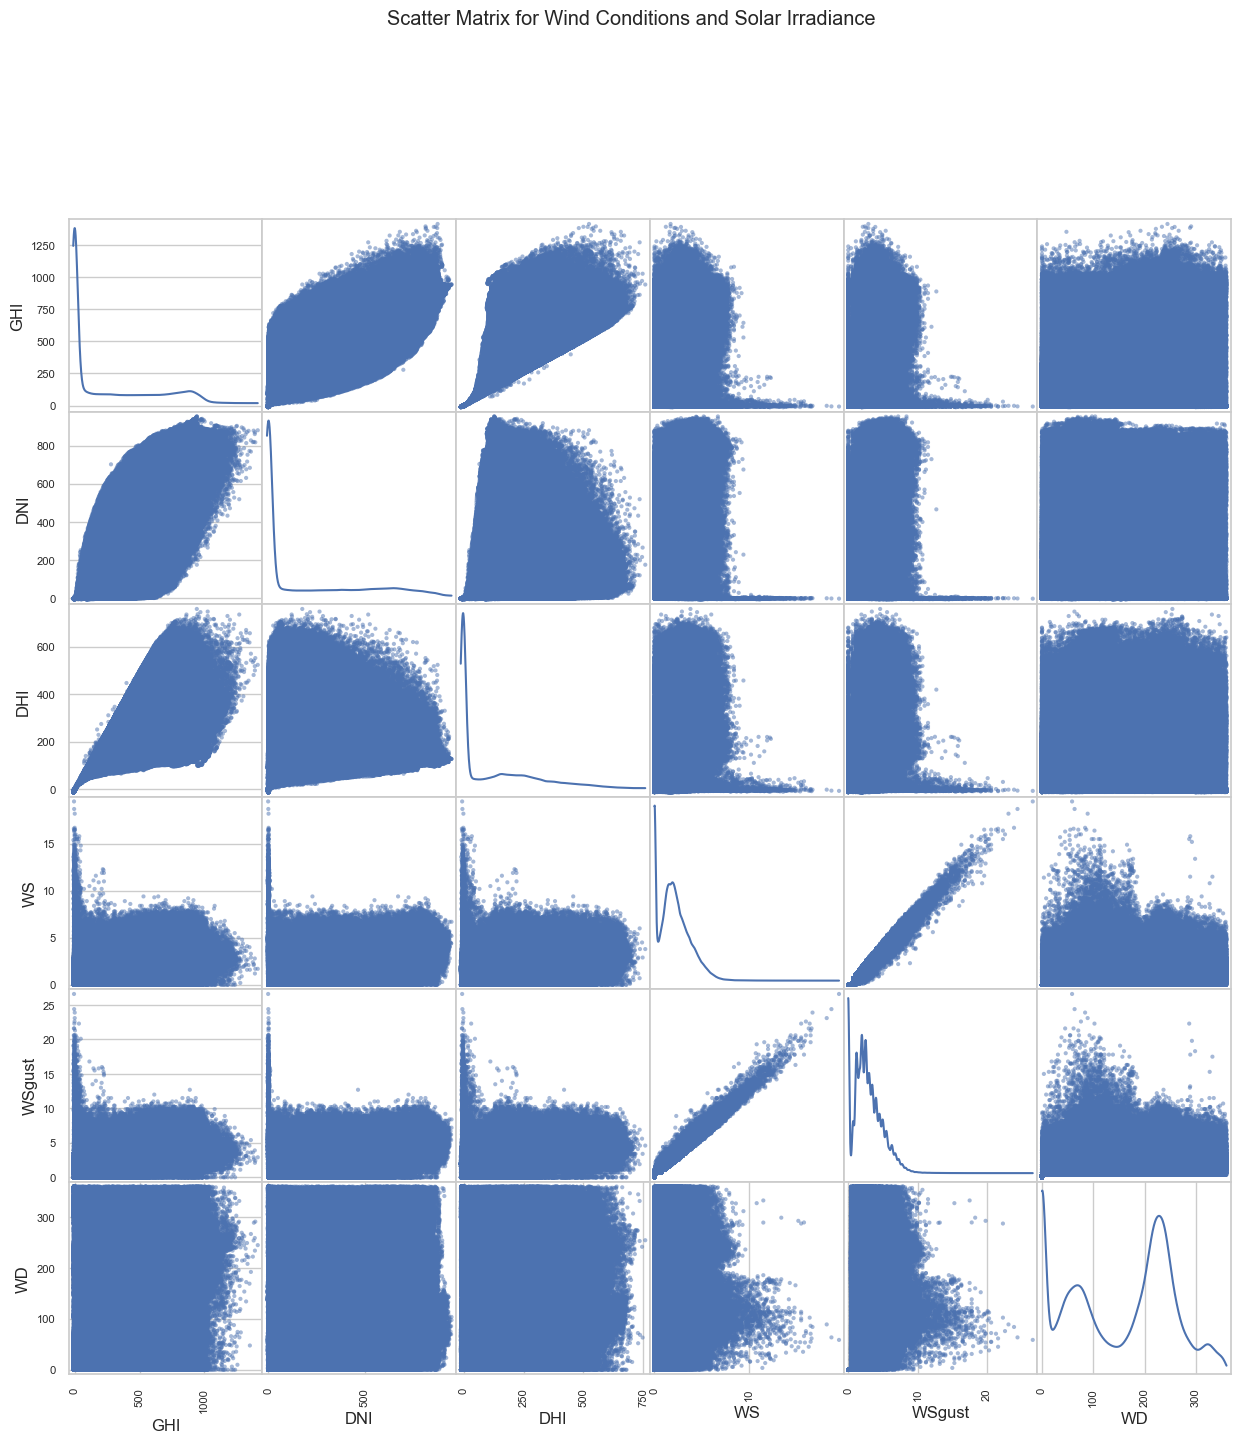

In [14]:
# Install scipy package
%pip install scipy

# Correlation Analysis

# Calculate the correlation matrix for solar radiation components and temperature measures
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Solar Radiation Components and Temperature Measures')
plt.show()

# Pair plot to visualize relationships between solar radiation components and temperature measures
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair Plot for Solar Radiation Components and Temperature Measures', y=1.02)
plt.show()

# Calculate the correlation matrix for wind conditions and solar irradiance
wind_correlation_matrix = df[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wind_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Wind Conditions and Solar Irradiance')
plt.show()

# Scatter matrix to visualize relationships between wind conditions and solar irradiance
pd.plotting.scatter_matrix(df[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']], figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

# Wind Analysis
Use radial bar plots or wind roses to identify trends and significant wind events by showing the distribution of wind speed and direction.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 1000x800 with 0 Axes>

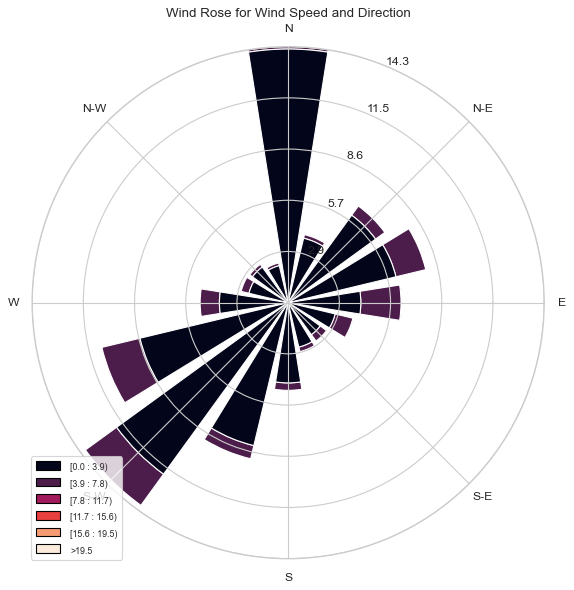

<Figure size 1000x800 with 0 Axes>

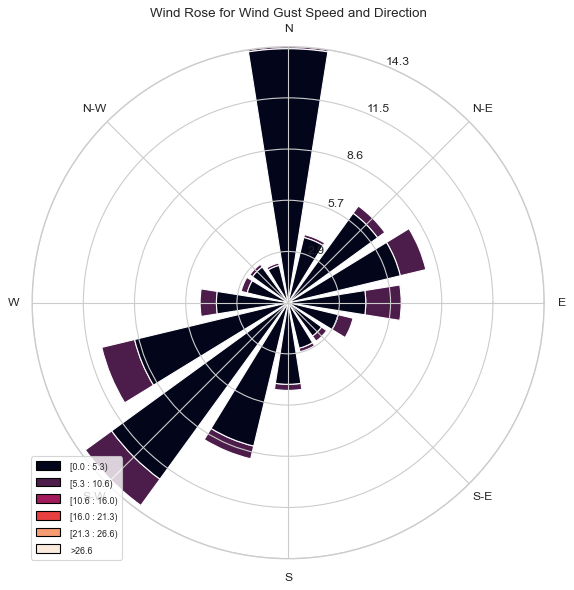

<Figure size 1000x800 with 0 Axes>

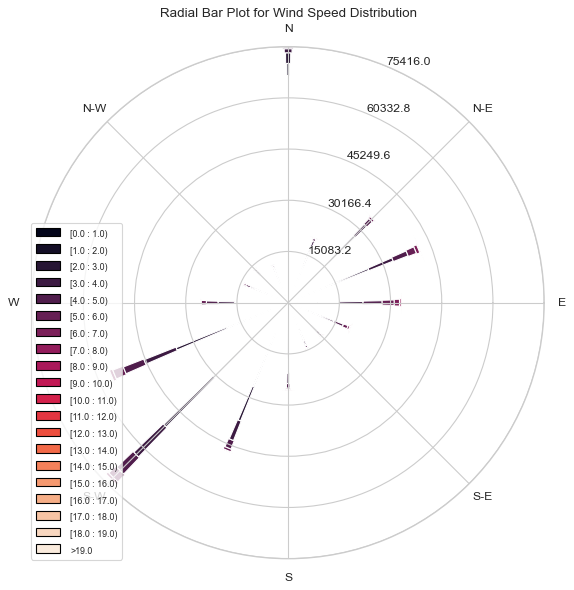

<Figure size 1000x800 with 0 Axes>

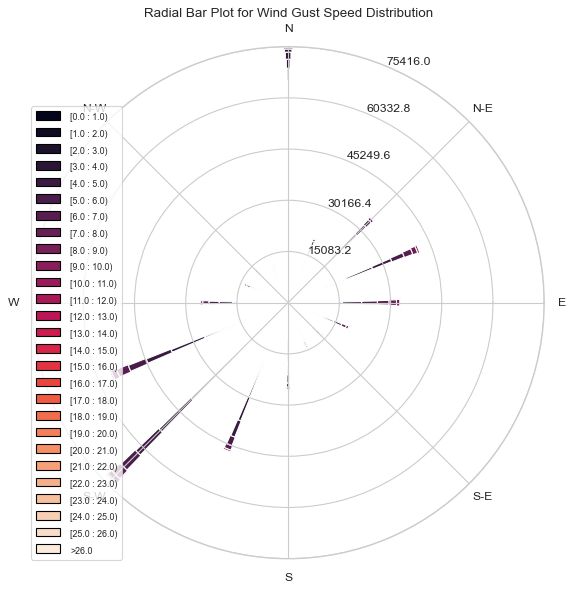

In [16]:
# Wind Analysis

# Install windrose package
%pip install windrose

# Import additional required libraries for wind analysis
from windrose import WindroseAxes

# Plot wind rose for wind speed and direction
plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose for Wind Speed and Direction')
plt.show()

# Plot wind rose for wind gust speed and direction
plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WSgust'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose for Wind Gust Speed and Direction')
plt.show()

# Plot radial bar plot for wind speed distribution
plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax()
ax.box(df['WD'], df['WS'], bins=np.arange(0, df['WS'].max(), 1), edgecolor='white')
ax.set_legend()
plt.title('Radial Bar Plot for Wind Speed Distribution')
plt.show()

# Plot radial bar plot for wind gust speed distribution
plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax()
ax.box(df['WD'], df['WSgust'], bins=np.arange(0, df['WSgust'].max(), 1), edgecolor='white')
ax.set_legend()
plt.title('Radial Bar Plot for Wind Gust Speed Distribution')
plt.show()

# Temperature Analysis
Examine how relative humidity (RH) might influence temperature readings and solar radiation.

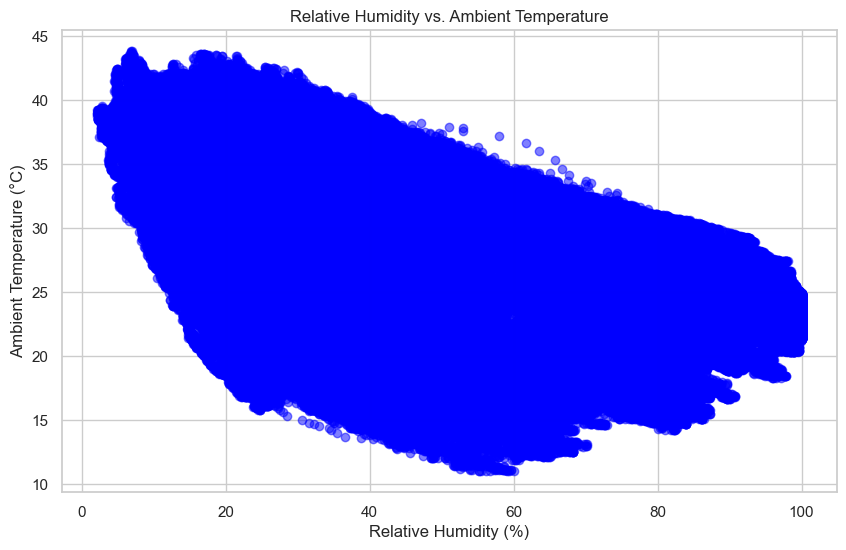

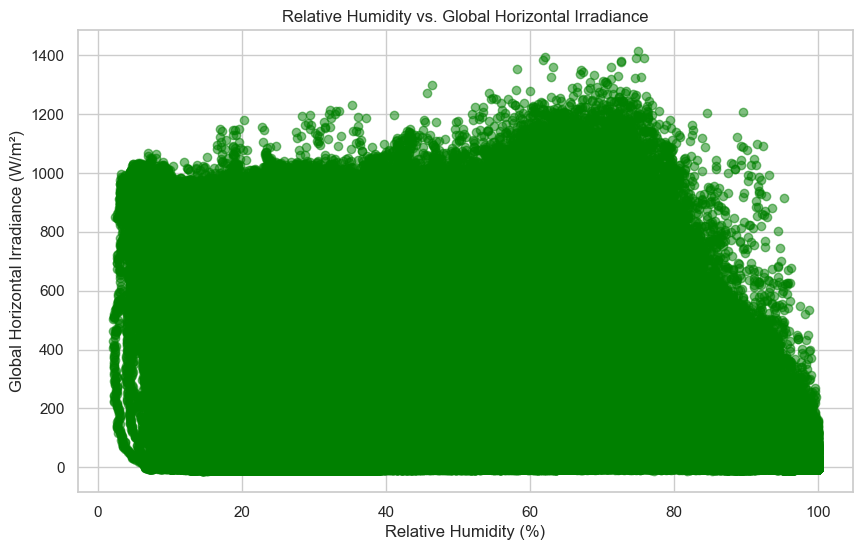

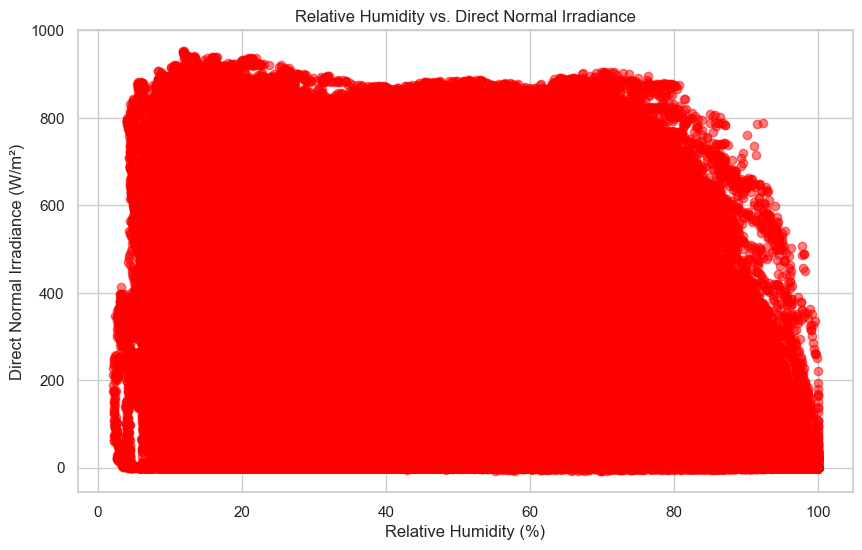

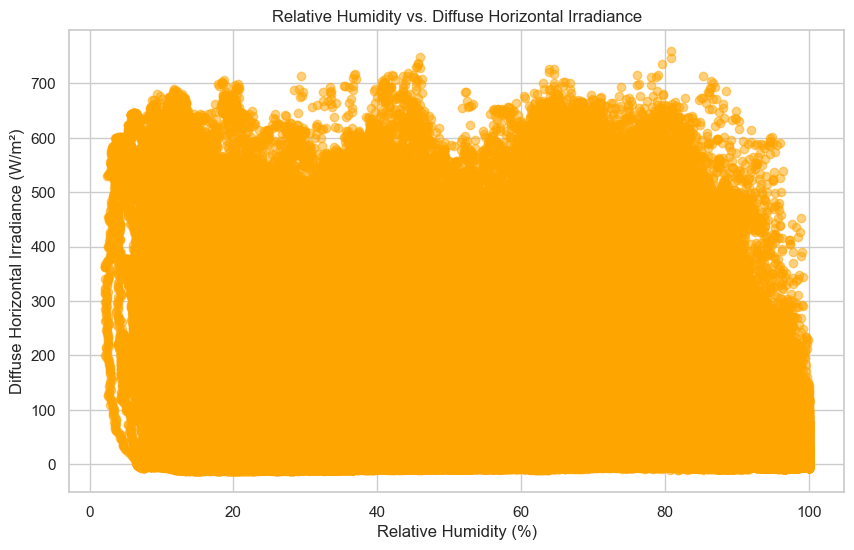

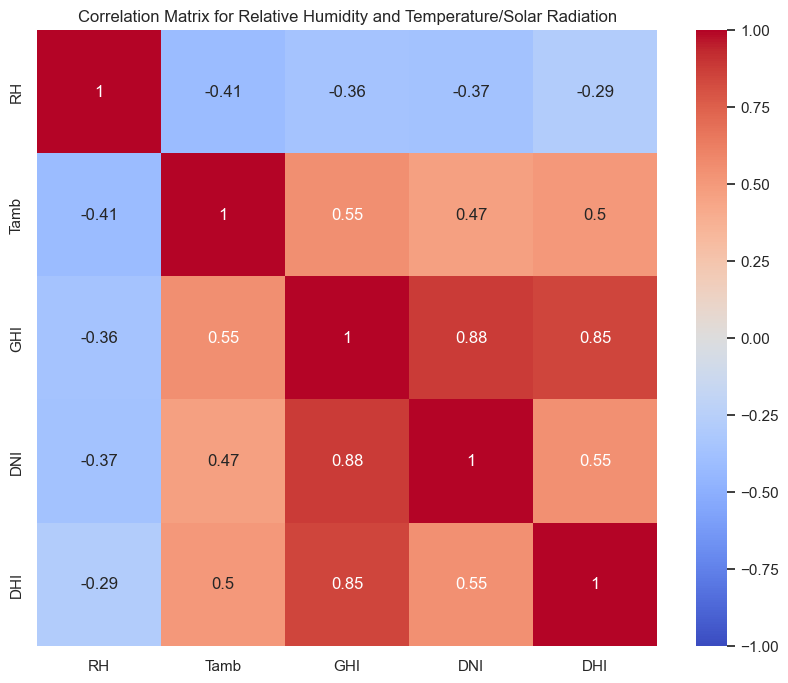

In [17]:
# Temperature Analysis

# Examine how relative humidity (RH) might influence temperature readings and solar radiation

# Scatter plot of RH vs. Tamb
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='blue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

# Scatter plot of RH vs. GHI
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='green')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.title('Relative Humidity vs. Global Horizontal Irradiance')
plt.show()

# Scatter plot of RH vs. DNI
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['DNI'], alpha=0.5, color='red')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.title('Relative Humidity vs. Direct Normal Irradiance')
plt.show()

# Scatter plot of RH vs. DHI
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['DHI'], alpha=0.5, color='orange')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Diffuse Horizontal Irradiance (W/m²)')
plt.title('Relative Humidity vs. Diffuse Horizontal Irradiance')
plt.show()

# Calculate correlation between RH and temperature readings/solar radiation
rh_correlation = df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rh_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Relative Humidity and Temperature/Solar Radiation')
plt.show()